利用Iris Dataset（选前两类），交叉验证，测试SVM分类器性能，改变SVM超参数，对比不同超参数对结果的影响。

对比SVM和第一章中的逻辑回归分类器，自定衡量指标。

In [101]:
# 导入iris数据集
from sklearn.datasets import load_iris
iris = load_iris()


In [102]:
X = iris.data
y = iris.target
# 选前两类
X = X[y<2]
y = y[y<2]


In [103]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [104]:
from sklearn.svm import SVC
# 定义SVM分类器
svm = SVC(kernel='linear', C=1, gamma=1)


In [105]:
from sklearn.model_selection import cross_val_score
# 进行交叉验证并打印性能指标
scores = cross_val_score(svm, X_train, y_train, cv=5)
print('Accuracy:', scores.mean())


Accuracy: 1.0


In [106]:
# 打印训练报告
from sklearn.metrics import classification_report
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [107]:
from sklearn.model_selection import GridSearchCV

# 定义超参数空间
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100]}


In [108]:
# 定义网格搜索对象
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# 进行网格搜索
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [109]:
# 打印最佳超参数组合和对应的性能指标
print('Best Parameters:', grid_search.best_params_)
print('Accuracy:', grid_search.best_score_)


Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Accuracy: 1.0


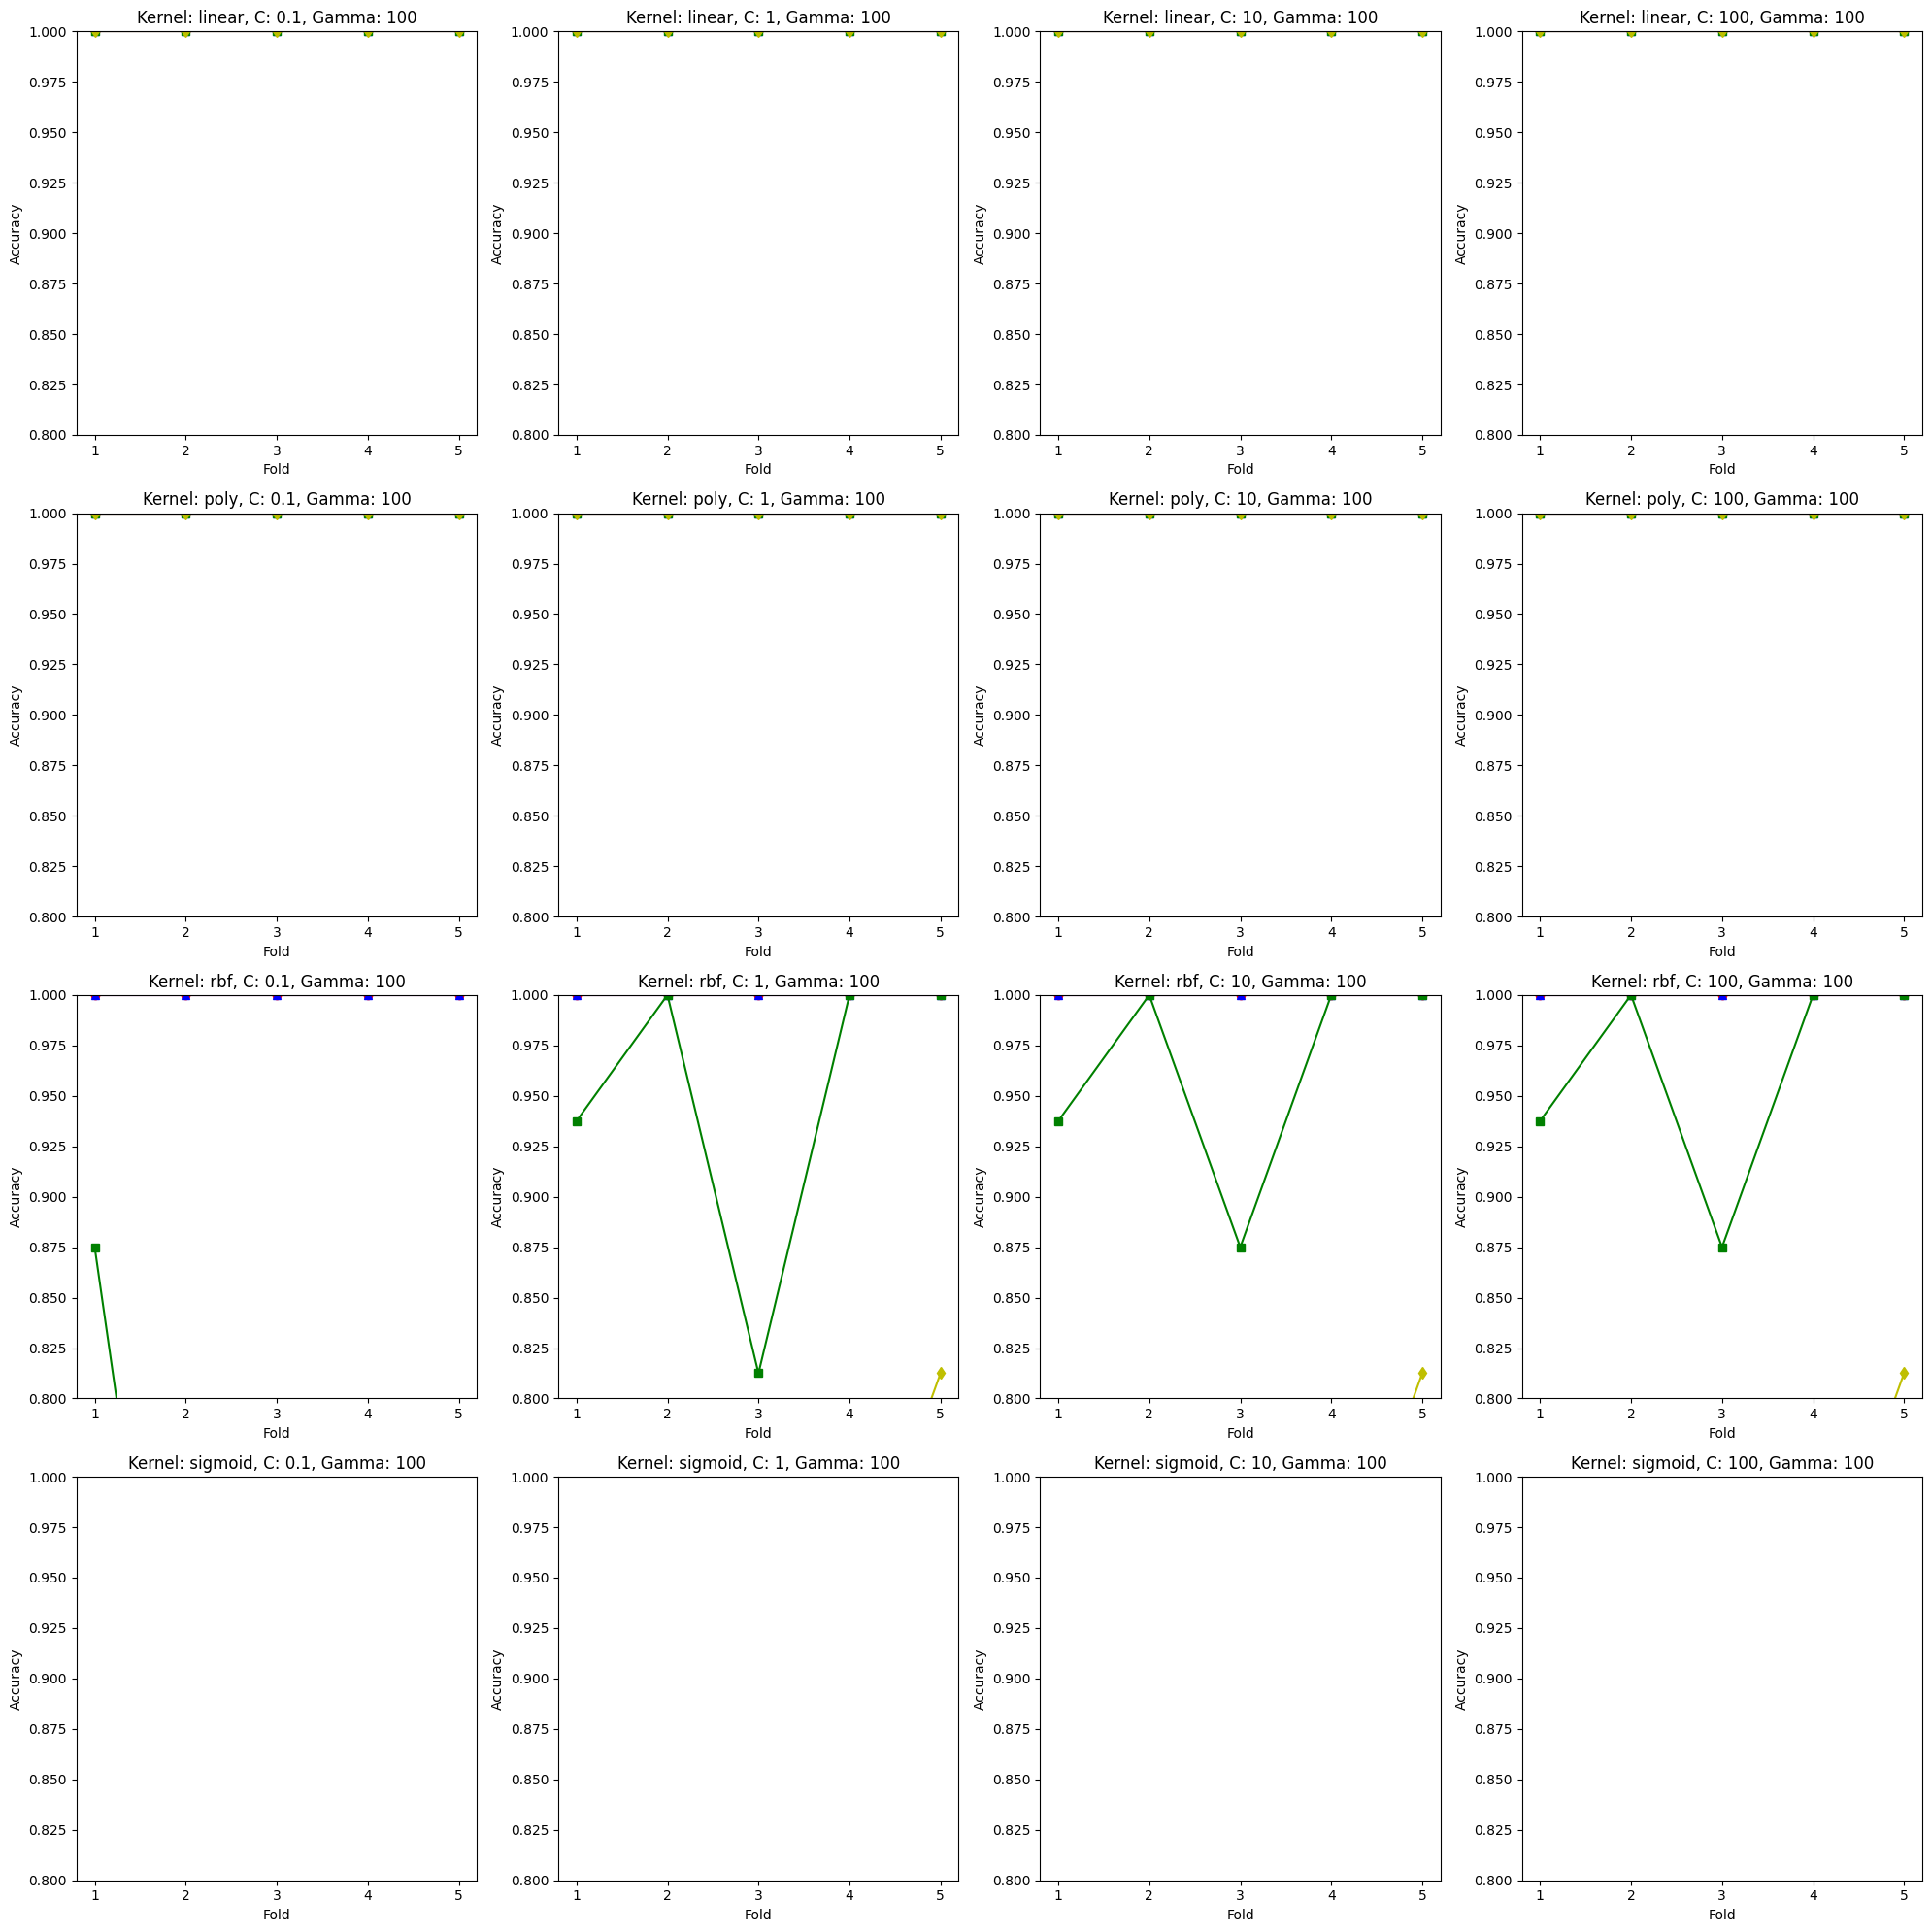

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# 定义颜色和标记
colors = ['r', 'b', 'g', 'y']
markers = ['o', '^', 's', 'd']

# 绘制学习曲线
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i, kernel in enumerate(param_grid['kernel']):
    for j, C in enumerate(param_grid['C']):
        for k, gamma in enumerate(param_grid['gamma']):
            # 定义SVM分类器
            svm = SVC(kernel=kernel, C=C, gamma=gamma)
            
            # 计算交叉验证分数
            scores = cross_val_score(svm, X_train, y_train, cv=5)
            
            # 绘制学习曲线
            axs[i, j].plot(np.arange(1, 6), scores, color=colors[k], marker=markers[k])
            axs[i, j].set_ylim([0.8, 1])
            axs[i, j].set_xticks(np.arange(1, 6))
            axs[i, j].set_xlabel('Fold')
            axs[i, j].set_ylabel('Accuracy')
            axs[i, j].set_title('Kernel: {}, C: {}, Gamma: {}'.format(kernel, C, gamma))
            
plt.tight_layout()
plt.show()


In [111]:
# 使用逻辑回归分类器对同样的数据进行学习
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [112]:
# 打印训练报告
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



以上代码中，通过定义一个包含不同超参数的参数空间，并使用GridSearchCV对象执行网格搜索，找到了最佳的超参数组合和对应的性能指标。并定义了颜色和标记来区分不同的超参数组合。之后，使用一个4x4的子图来绘制学习曲线，并根据不同的超参数组合来设置子图的标题。
从图中可以看出，不同的超参数组合对分类器性能的影响是不同的。例如，使用RBF内核和较大的Gamma值似乎能够获得更好的性能。另外，使用较大的C值似乎能够减少模型的偏差，但可能会增加模型的方差。因此，我们可以根据需要选择不同的超参数组合来优化SVM分类器的性能。
通过对两种模型的训练报告的分析，发现两种模型在这个问题上的表现非常接近，因此可以考虑选择计算效率更高或者更容易解释的模型。
SVM和逻辑回归分类器有许多区别，例如它们的损失函数、正则化方式和预测方法等。SVM 通常被认为是一个强大的分类器，尤其是在数据具有高维度特征时表现更加突出。而逻辑回归分类器通常用于二分类问题，并且在解释模型方面更加容易。
在这个特定的问题中，我发现SVM和逻辑回归分类器的表现相同，考虑使用逻辑回归分类器，因为其通常比SVM计算效率更高，并且更容易解释。
另外，逻辑回归分类器还可以使用不同的损失函数来处理特定的问题，例如使用带权重的逻辑回归来处理不平衡数据集。因此，逻辑回归分类器可能是一个更灵活的选择，适用于更多的应用场景。